In [1]:
library(tidyverse)
library(readxl)
library(writexl)

## Load Data

In [2]:
cmv <- read_excel("data/cmv.xlsx")
head(cmv)

ID,age,prior.radiation,aKIRs,cmv,donor_negative,donor_positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,61,0,1,1,recipient_positive,NA
2,62,1,5,0,recipient_negative,NA
3,63,0,3,0,NA,recipient_positive
4,33,1,2,0,recipient_positive,NA
5,54,0,6,0,NA,recipient_positive
6,55,0,2,1,NA,recipient_positive


## Filter Data

In [3]:
cmv_subset <- cmv %>%
  filter(age > 65)

## Save Data

In [4]:
write_xlsx(cmv_subset, "data/cmv_subset-r-jupyter.xlsx")

## Tidy Data

In [5]:
cmv_tidy <- cmv %>%
  pivot_longer(
    donor_negative:donor_positive,
    names_to = 'donor_status',
    values_to = 'recipient_status'
  )

## Plot Data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


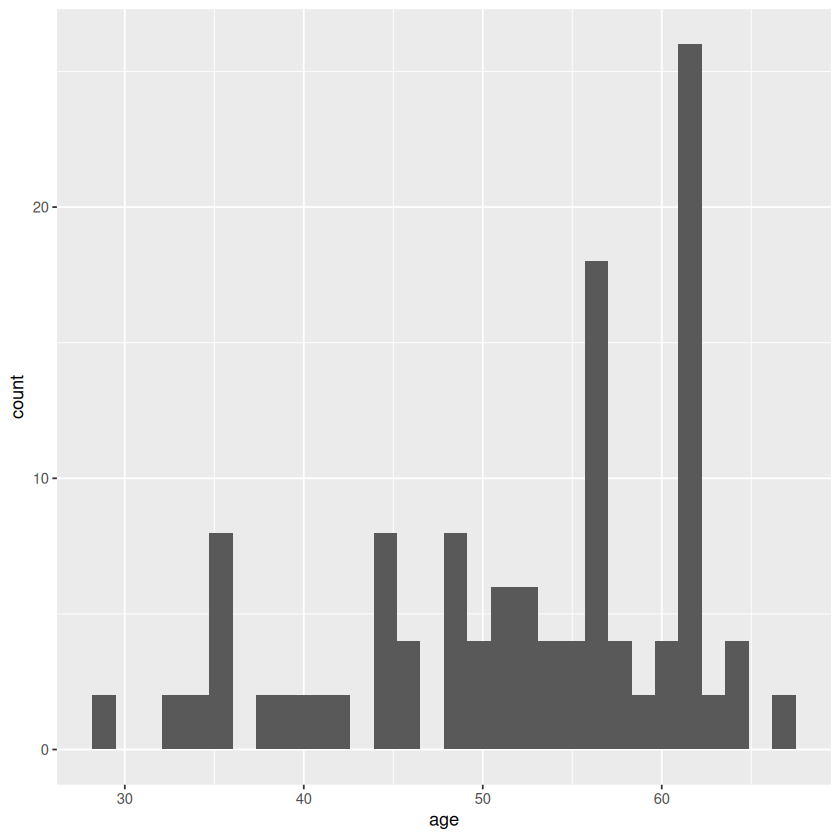

In [6]:
ggplot(cmv_tidy, aes(x = age)) + geom_histogram()

## Fit a Model

In [7]:
mod <- glm(
  cmv ~ age + prior.radiation + donor_status,
  data = cmv_tidy,
  family = "binomial"
)

summary(mod)


Call:
glm(formula = cmv ~ age + prior.radiation + donor_status, family = "binomial", 
    data = cmv_tidy)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)
(Intercept)                -6.809e-01  1.186e+00  -0.574    0.566
age                         7.669e-03  2.133e-02   0.360    0.719
prior.radiation            -6.420e-01  5.553e-01  -1.156    0.248
donor_statusdonor_positive -1.265e-16  3.629e-01   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 172.92  on 127  degrees of freedom
Residual deviance: 170.74  on 124  degrees of freedom
AIC: 178.74

Number of Fisher Scoring iterations: 4
